In [3]:
import pandas as pd  # Mengimport library pandas dengan alias pd untuk digunakan dalam pengolahan data.
import numpy as np  # Mengimport library numpy dengan alias np untuk digunakan dalam pengolahan data numerik.
import matplotlib.pyplot as plt  # Mengimport library matplotlib.pyplot dengan alias plt untuk digunakan dalam visualisasi data.
import seaborn as sns  # Mengimport library seaborn dengan alias sns untuk digunakan dalam visualisasi data.
from sklearn.linear_model import LogisticRegression  # Mengimport class LogisticRegression dari library sklearn untuk digunakan dalam pembuatan model regresi logistik.
from sklearn.preprocessing import LabelEncoder  # Mengimport class LabelEncoder dari library sklearn untuk digunakan dalam encoding label.
from sklearn.preprocessing import StandardScaler  # Mengimport class StandardScaler dari library sklearn untuk digunakan dalam standardisasi fitur.
from sklearn.model_selection import cross_val_score  # Mengimport fungsi cross_val_score dari library sklearn untuk digunakan dalam evaluasi model.
from sklearn.model_selection import train_test_split  # Mengimport fungsi train_test_split dari library sklearn untuk digunakan dalam membagi data menjadi data latih dan data uji.
from sklearn import metrics  # Mengimport modul metrics dari library sklearn untuk digunakan dalam evaluasi kinerja model.
from sklearn.metrics import confusion_matrix  # Mengimport fungsi confusion_matrix dari library sklearn untuk digunakan dalam menghitung matriks kebingungan.

In [5]:
df = pd.read_csv('Transformed Data Set - Sheet1.csv')  # Membaca file CSV dan menyimpannya ke dalam DataFrame df.
df  # Menampilkan DataFrame df.

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F
...,...,...,...,...,...
61,Cool,Rock,Vodka,Coca Cola/Pepsi,M
62,Cool,Hip hop,Beer,Coca Cola/Pepsi,M
63,Neutral,Hip hop,Doesn't drink,Fanta,M
64,Cool,Rock,Wine,Coca Cola/Pepsi,M


In [7]:
df.describe()  # Menampilkan ringkasan statistik dari DataFrame df.

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
count,66,66,66,66,66
unique,3,7,6,4,2
top,Cool,Rock,Doesn't drink,Coca Cola/Pepsi,F
freq,37,19,14,32,33


In [9]:
df.info()  # Menampilkan informasi tentang DataFrame df, termasuk tipe data dan jumlah data non-null.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Favorite Color        66 non-null     object
 1   Favorite Music Genre  66 non-null     object
 2   Favorite Beverage     66 non-null     object
 3   Favorite Soft Drink   66 non-null     object
 4   Gender                66 non-null     object
dtypes: object(5)
memory usage: 2.7+ KB


In [11]:
df.isnull().sum()  # Menghitung jumlah nilai null (kosong) untuk setiap kolom dalam DataFrame df.

Favorite Color          0
Favorite Music Genre    0
Favorite Beverage       0
Favorite Soft Drink     0
Gender                  0
dtype: int64

In [13]:
X=df.drop(['Gender'],axis=1)  # Menghilangkan kolom 'Gender' dari DataFrame df dan menyimpannya sebagai fitur X.
Y=df['Gender']  # Menyimpan kolom 'Gender' dari DataFrame df sebagai target Y.
X.shape, Y.shape  # Menampilkan bentuk (shape) dari fitur X dan target Y.

((66, 4), (66,))

In [15]:
# Membagi dataset menjadi data latih dan data uji
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [17]:
label_encoders = {}  # Membuat kamus kosong untuk menyimpan objek LabelEncoder.
for column in X_train.columns:  # Looping melalui setiap kolom dalam data latih.
    le = LabelEncoder()  # Membuat objek LabelEncoder untuk setiap kolom.
    X_train[column] = le.fit_transform(X_train[column])  # Melakukan encoding pada data latih untuk kolom tertentu.
    X_test[column] = le.transform(X_test[column])  # Melakukan encoding pada data uji menggunakan LabelEncoder yang sama dengan data latih.
    label_encoders[column] = le  # Menyimpan objek LabelEncoder dalam kamus untuk setiap kolom.

In [19]:
model = LogisticRegression()  # Membuat objek model regresi logistik.
model.fit(X_train, Y_train)  # Melatih model menggunakan data latih.

LogisticRegression()

In [21]:
print(model.coef_)  # Menampilkan koefisien model regresi logistik.

[[-0.26000166 -0.17362339 -0.11955988  0.19735981]]


In [23]:
Y_pred = pd.Series(model.predict(X_test))  # Memprediksi kelas target menggunakan data uji.
Y_test = Y_test.reset_index(drop=True)  # Mereset indeks dari Y_test.
z = pd.concat([Y_test, Y_pred], axis=1)  # Menggabungkan Y_test dan Y_pred menjadi DataFrame z.
z.columns = ['True', 'Prediction']  # Memberi nama kolom pada DataFrame z.
z.head()  # Menampilkan lima baris pertama dari DataFrame z.

,True,Prediction
0,M,M
1,F,M
2,F,M
3,M,M
4,M,M


In [25]:
print("Accuracy", metrics.accuracy_score(Y_test, Y_pred))  # Menampilkan akurasi model.
print("Precision", metrics.precision_score(Y_test, Y_pred, pos_label="M"))  # Menampilkan presisi model.
print("Recall", metrics.recall_score(Y_test, Y_pred, pos_label="M"))  # Menampilkan recall model.

Accuracy 0.5714285714285714
Precision 0.75
Recall 0.6


In [27]:
print("Accuracy", metrics.accuracy_score(Y_test, Y_pred))
print("Precision", metrics.precision_score(Y_test, Y_pred, pos_label="F"))
print("Recall", metrics.recall_score(Y_test, Y_pred, pos_label="F"))

Accuracy 0.5714285714285714
Precision 0.3333333333333333
Recall 0.5


Text(0.5, 23.52222222222222, 'True')

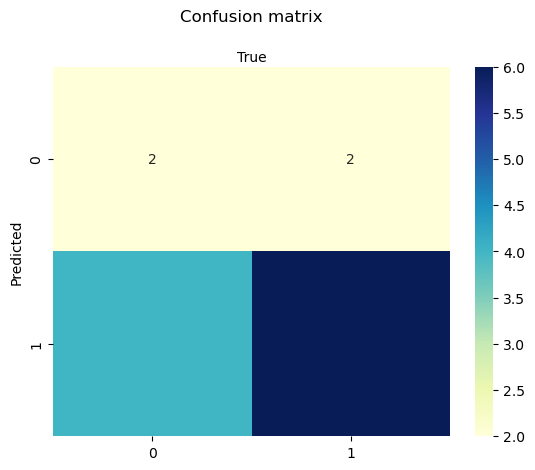

In [29]:
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)  # Menghitung matriks kebingungan antara Y_test dan Y_pred.

labels = [0, 1]  # Menyimpan label kelas.
fig, ax = plt.subplots()  # Membuat subplot untuk visualisasi.
tick_marks = np.arange(len(labels))  # Menghitung jumlah label.
plt.xticks(tick_marks, labels)  # Menentukan label pada sumbu x.
plt.yticks(tick_marks, labels)  # Menentukan label pada sumbu y.

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')  # Membuat heatmap dari matriks kebingungan.
ax.xaxis.set_label_position("top")  # Mengatur posisi label sumbu x.
plt.title('Confusion matrix', y=1.1)  # Memberi judul heatmap.
plt.ylabel('Predicted')  # Memberi label pada sumbu y.
plt.xlabel('True')  # Memberi label pada sumbu x.

In [31]:
import joblib

#Model yang ingin anda simpan
joblib.dump(model, 'Rafi.joblib')

['Rafi.joblib']